In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
#importing the required datasets
df=pd.read_csv('clean_data.csv')


# Can you detect cascading delays in one airport create delays in other?


In [3]:
#selecting the required columns
df=df.loc[:,['Year','Month','DayofMonth','DayOfWeek','DepTime','TailNum','ArrDelay','DepDelay','Origin','LateAircraftDelay','Dest']]

In [4]:
df #explore dataframe

,Year,Month,DayofMonth,DayOfWeek,DepTime,TailNum,ArrDelay,DepDelay,Origin,LateAircraftDelay,Dest
0,2006,1,11,3,743,N657AW,6,-2,ATL,0,PHX
1,2006,1,11,3,1053,N834AW,-5,0,ATL,0,PHX
2,2006,1,11,3,1915,N605AW,-23,0,ATL,0,PHX
3,2006,1,11,3,1753,N312AW,-8,-2,AUS,0,PHX
4,2006,1,11,3,824,N309AW,0,-8,AUS,0,PHX
...,...,...,...,...,...,...,...,...,...,...,...
14268923,2007,12,15,6,1558,N670DN,13,-7,MCO,0,ATL
14268924,2007,12,15,6,1902,N829MH,5,11,ATL,0,SLC
14268925,2007,12,15,6,1024,N623DL,15,-1,LAX,0,ATL
14268926,2007,12,15,6,1353,N970DL,36,38,DFW,36,ATL


In [5]:
df.isna().sum() # checking dataset for null values

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
TailNum              0
ArrDelay             0
DepDelay             0
Origin               0
LateAircraftDelay    0
Dest                 0
dtype: int64

In [6]:
 #let us now convert the data into datetime format


In [7]:
#converting the month
# we ensure that all elements in 'Month' have two digits by filling the column with zeros where required
def condition(x):
    if len(x)==1:
        return x.zfill(2)
    else:
        return x
month=df['Month'].astype(str)
month=month.apply(lambda x: condition(x))
month

0           01
1           01
2           01
3           01
4           01
            ..
14268923    12
14268924    12
14268925    12
14268926    12
14268927    12
Name: Month, Length: 14268928, dtype: object

In [8]:
#capturing the days
day=df['DayofMonth'].astype(str)
day=day.apply(lambda x: condition(x))
day

0           11
1           11
2           11
3           11
4           11
            ..
14268923    15
14268924    15
14268925    15
14268926    15
14268927    15
Name: DayofMonth, Length: 14268928, dtype: object

In [9]:

#capturing the hours
hour=df['DepTime'].apply(lambda x : np.floor(x/100)).astype(int)
hour

0            7
1           10
2           19
3           17
4            8
            ..
14268923    15
14268924    19
14268925    10
14268926    13
14268927    18
Name: DepTime, Length: 14268928, dtype: int32

In [10]:
#capturing the minutes and discarding the hour component

minutes=df['DepTime'].apply(lambda x:x%10**2).astype(int)
minutes

0           43
1           53
2           15
3           53
4           24
            ..
14268923    58
14268924     2
14268925    24
14268926    53
14268927    24
Name: DepTime, Length: 14268928, dtype: int32

In [11]:
#converting year to str
df['Year']=df['Year'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14268928 entries, 0 to 14268927
Data columns (total 11 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Year               object
 1   Month              int64 
 2   DayofMonth         int64 
 3   DayOfWeek          int64 
 4   DepTime            int64 
 5   TailNum            object
 6   ArrDelay           int64 
 7   DepDelay           int64 
 8   Origin             object
 9   LateAircraftDelay  int64 
 10  Dest               object
dtypes: int64(7), object(4)
memory usage: 1.2+ GB


In [12]:
#datetime format # we are creating a new column in df
df['datetime']=pd.to_datetime(day+'/'+month+'/'+df['Year']+','+hour.astype(str)+':'+minutes.astype(str),format='%d/%m/%Y,%H:%M')

In [13]:
df # exploring the dataset
#we can see the 'Year','Month','DayofMonth' ,'DepTime' have all been recognized under one column 'datetime'

,Year,Month,DayofMonth,DayOfWeek,DepTime,TailNum,ArrDelay,DepDelay,Origin,LateAircraftDelay,Dest,datetime
0,2006,1,11,3,743,N657AW,6,-2,ATL,0,PHX,2006-01-11 07:43:00
1,2006,1,11,3,1053,N834AW,-5,0,ATL,0,PHX,2006-01-11 10:53:00
2,2006,1,11,3,1915,N605AW,-23,0,ATL,0,PHX,2006-01-11 19:15:00
3,2006,1,11,3,1753,N312AW,-8,-2,AUS,0,PHX,2006-01-11 17:53:00
4,2006,1,11,3,824,N309AW,0,-8,AUS,0,PHX,2006-01-11 08:24:00
...,...,...,...,...,...,...,...,...,...,...,...,...
14268923,2007,12,15,6,1558,N670DN,13,-7,MCO,0,ATL,2007-12-15 15:58:00
14268924,2007,12,15,6,1902,N829MH,5,11,ATL,0,SLC,2007-12-15 19:02:00
14268925,2007,12,15,6,1024,N623DL,15,-1,LAX,0,ATL,2007-12-15 10:24:00
14268926,2007,12,15,6,1353,N970DL,36,38,DFW,36,ATL,2007-12-15 13:53:00


In [14]:
#create a new dataset with 'TailNum','datetime','ArrDelay','DepDelay' and group by 'TailNum','datetime'
#the .mean() gives us the average 'ArrDelay','DepDelay' for each group , this visible when we explore the dataframe in the next code
df=df[['TailNum','datetime','ArrDelay','DepDelay']].groupby(['TailNum','datetime']).mean().reset_index()


In [15]:
df #explore dataframe

,TailNum,datetime,ArrDelay,DepDelay
0,0,2006-01-01 20:36:00,26.0,51.0
1,0,2006-01-01 20:55:00,-1.0,0.0
2,0,2006-01-02 20:36:00,770.0,51.0
3,0,2006-01-02 21:45:00,95.0,100.0
4,0,2006-01-04 15:05:00,-18.0,-10.0
...,...,...,...,...
14268745,NHZOAL,2007-12-29 15:52:00,1.0,2.0
14268746,NHZOAL,2007-12-30 15:09:00,22.0,39.0
14268747,NHZOAL,2007-12-30 19:58:00,39.0,53.0
14268748,NHZOAL,2007-12-31 11:30:00,45.0,30.0


In [16]:
df=df.set_index('datetime')  # setting the dataframe index as 'datetime'

In [17]:
df #explore dataframe

,TailNum,ArrDelay,DepDelay
datetime,,,
2006-01-01 20:36:00,0,26.0,51.0
2006-01-01 20:55:00,0,-1.0,0.0
2006-01-02 20:36:00,0,770.0,51.0
2006-01-02 21:45:00,0,95.0,100.0
2006-01-04 15:05:00,0,-18.0,-10.0
...,...,...,...
2007-12-29 15:52:00,NHZOAL,1.0,2.0
2007-12-30 15:09:00,NHZOAL,22.0,39.0
2007-12-30 19:58:00,NHZOAL,39.0,53.0


In [18]:
#creating a new column were we sum mean 'ArrDelay' and 'DepDelay' and divide by 2
df['Average Delay']=(df['ArrDelay'].astype(int)+df['DepDelay'].astype(int))/2
df

,TailNum,ArrDelay,DepDelay,Average Delay
datetime,,,,
2006-01-01 20:36:00,0,26.0,51.0,38.5
2006-01-01 20:55:00,0,-1.0,0.0,-0.5
2006-01-02 20:36:00,0,770.0,51.0,410.5
2006-01-02 21:45:00,0,95.0,100.0,97.5
2006-01-04 15:05:00,0,-18.0,-10.0,-14.0
...,...,...,...,...
2007-12-29 15:52:00,NHZOAL,1.0,2.0,1.5
2007-12-30 15:09:00,NHZOAL,22.0,39.0,30.5
2007-12-30 19:58:00,NHZOAL,39.0,53.0,46.0


In [19]:
df=df.sort_values(['TailNum','datetime'])  #sort dataframe values according to 'TailNum' and 'datetime'

In [20]:
df # explore dataframe

,TailNum,ArrDelay,DepDelay,Average Delay
datetime,,,,
2006-01-01 20:36:00,0,26.0,51.0,38.5
2006-01-01 20:55:00,0,-1.0,0.0,-0.5
2006-01-02 20:36:00,0,770.0,51.0,410.5
2006-01-02 21:45:00,0,95.0,100.0,97.5
2006-01-04 15:05:00,0,-18.0,-10.0,-14.0
...,...,...,...,...
2007-12-29 15:52:00,NHZOAL,1.0,2.0,1.5
2007-12-30 15:09:00,NHZOAL,22.0,39.0,30.5
2007-12-30 19:58:00,NHZOAL,39.0,53.0,46.0


In [21]:
#now we create a new column called 'upcoming delay'
#we compare the upcoming delay with the current delay #it is important to note that 'Average Delay' will be considered as the present delay being faced
df['Upcoming Delay']=df['Average Delay'].shift(-1)
df

,TailNum,ArrDelay,DepDelay,Average Delay,Upcoming Delay
datetime,,,,,
2006-01-01 20:36:00,0,26.0,51.0,38.5,-0.5
2006-01-01 20:55:00,0,-1.0,0.0,-0.5,410.5
2006-01-02 20:36:00,0,770.0,51.0,410.5,97.5
2006-01-02 21:45:00,0,95.0,100.0,97.5,-14.0
2006-01-04 15:05:00,0,-18.0,-10.0,-14.0,8.0
...,...,...,...,...,...
2007-12-29 15:52:00,NHZOAL,1.0,2.0,1.5,30.5
2007-12-30 15:09:00,NHZOAL,22.0,39.0,30.5,46.0
2007-12-30 19:58:00,NHZOAL,39.0,53.0,46.0,37.5


In [22]:
df.isna().sum()

TailNum           0
ArrDelay          0
DepDelay          0
Average Delay     0
Upcoming Delay    1
dtype: int64

In [23]:
df=df.dropna()

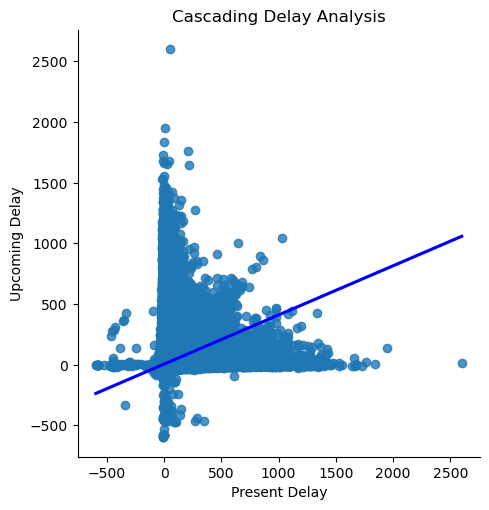

In [24]:
#scatter plot to show the relaationship between delay faced at present and upcoming delays
sns.lmplot(data=df,x='Average Delay',y='Upcoming Delay', line_kws={'color':'blue'})
plt.title('Cascading Delay Analysis')
plt.xlabel('Present Delay')
plt.ylabel('Upcoming Delay')


plt.savefig('Cascading Delay Analysis.png')
plt.show()

In [25]:
df['Average Delay'].corr(df['Upcoming Delay']) # we see there is a positive linear association between delays faced at present and upcoming delays

0.40502728910321334

In [26]:
# To explore whether cascading delays in one airport create delays in others , a crosstabulation is created to check 
#relationship between delay faced in the previous airport that was departed and delay faced in the current airport on arrival.
#since crosstabs work only for categorical variables, the delay in the current airport and previous airport was changed ,
#where 1s indicate a delay and 0s indicate no delay

In [27]:
#encoding columns 'Average Delay' and 'Upcoming Delay' into new columns 'facing current delay' and 'facing upcoming delay'

#define a code to be run through columns 'Average Delay' and 'Upcoming Delay' to identify a delay or no delay in the form of 1s and 0s
def condition(y):
    if y>0:
        return '1'
    else:
        return '0'


In [28]:
#encoding columns 'Average Delay' and 'Upcoming Delay' into new columns 'facing current delay' and 'facing upcoming delay'
df['facing current delay']=df['Average Delay'].apply(lambda y:condition(y))
df['facing upcoming delay']=df['Upcoming Delay'].apply(lambda y:condition(y))

C:\Users\Ibrahim Hameem\AppData\Local\Temp\ipykernel_8488\2246397554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['facing current delay']=df['Average Delay'].apply(lambda y:condition(y))
C:\Users\Ibrahim Hameem\AppData\Local\Temp\ipykernel_8488\2246397554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['facing upcoming delay']=df['Upcoming Delay'].apply(lambda y:condition(y))


In [29]:
df # explore dataframe

,TailNum,ArrDelay,DepDelay,Average Delay,Upcoming Delay,facing current delay,facing upcoming delay
datetime,,,,,,,
2006-01-01 20:36:00,0,26.0,51.0,38.5,-0.5,1,0
2006-01-01 20:55:00,0,-1.0,0.0,-0.5,410.5,0,1
2006-01-02 20:36:00,0,770.0,51.0,410.5,97.5,1,1
2006-01-02 21:45:00,0,95.0,100.0,97.5,-14.0,1,0
2006-01-04 15:05:00,0,-18.0,-10.0,-14.0,8.0,0,1
...,...,...,...,...,...,...,...
2007-12-29 11:59:00,NHZOAL,8.0,29.0,18.5,1.5,1,1
2007-12-29 15:52:00,NHZOAL,1.0,2.0,1.5,30.5,1,1
2007-12-30 15:09:00,NHZOAL,22.0,39.0,30.5,46.0,1,1


In [30]:
df.isna().sum()   # #checking for null values


TailNum                  0
ArrDelay                 0
DepDelay                 0
Average Delay            0
Upcoming Delay           0
facing current delay     0
facing upcoming delay    0
dtype: int64

In [31]:
df # explore dataset

,TailNum,ArrDelay,DepDelay,Average Delay,Upcoming Delay,facing current delay,facing upcoming delay
datetime,,,,,,,
2006-01-01 20:36:00,0,26.0,51.0,38.5,-0.5,1,0
2006-01-01 20:55:00,0,-1.0,0.0,-0.5,410.5,0,1
2006-01-02 20:36:00,0,770.0,51.0,410.5,97.5,1,1
2006-01-02 21:45:00,0,95.0,100.0,97.5,-14.0,1,0
2006-01-04 15:05:00,0,-18.0,-10.0,-14.0,8.0,0,1
...,...,...,...,...,...,...,...
2007-12-29 11:59:00,NHZOAL,8.0,29.0,18.5,1.5,1,1
2007-12-29 15:52:00,NHZOAL,1.0,2.0,1.5,30.5,1,1
2007-12-30 15:09:00,NHZOAL,22.0,39.0,30.5,46.0,1,1


In [32]:
# crosstabulation
table=pd.crosstab(df['facing upcoming delay'],df['facing current delay'],rownames=['current delay'],colnames=['upcoming delay'])

In [33]:
table #observed values

upcoming delay,0,1
current delay,,
0,5221665,2391893
1,2391893,4263298


In [ ]:
#calculations show that 64.1%  of flights that had a delay at its present airport had a delay at its next destination airport (4263298/4263298+2391893) and 31.4%  of flights that faced a delay at its present airport would be able to reach its destination airport with no delay.
# using the table of observed values a chi squared test can be carried out to test our observations

In [36]:
#lets first set out our hyp0theses
print('H0: There is no association between facing current delay and facing upcoming delay')
print('H1: There is an association between facing current delay and facing upcoming delay' )

H0: There is no association between facing current delay and facing upcoming delay
H1: There is an association between facing current delay and facing upcoming delay


In [37]:
#import libraries required for further analysis
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [38]:
stats.chi2_contingency(table)  # we have chi squared test statistic= 1520474.5881165017
                                #p-value=0
                                 #degrees of freedom 1

(1520474.5881165017,
 0.0,
 1,
 array([[4062463.03858621, 3551094.96141379],
        [3551094.96141379, 3104096.03858621]]))

In [39]:
#if we are testing at 5% siginificance level 
# our p-value<0.05 therefore at 5% significance level we reject the null hypothesis HO
# our p-value<0.01 therefore at 1% significance level we reject the null hypothesis HO
# we can conclude there is strong evidence to claim there is  a linear association between facing current delay and facing upcoming delay

In [40]:
# We can conclude cascading failures as delays in one airport does create delays in others